# Business Growth Overview

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import datetime

## Import Data Source

In [4]:
data_src = "Raw-Agg Perf Nationwide_Wk 2023021.csv"
df = pd.read_csv(data_src, low_memory=False)
# df = pd.read_csv(data_src, names=cols, low_memory=False)
# df = pd.read_csv(data_src, names=cols, header=None, low_memory=False)
df.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_QTR,TM_KEY_YR,DAY_DESC,MONTH_DESC,QUARTER_DESC,COMP_CD,METRIC_CD,...,SEQ,PRIORITY,REMARK,AREA_TYPE,AREA_CD,AREA_NAME,REMARK_ACTUAL,REMARK_TARGET,PPN_TM,METRIC_NAME_GROUP
0,20230301,2023009,202303,20231,2023,Wednesday,March,Quarter 1,TRUE,DIS10015,...,7015.0,High,NaN,P,P,Nationwide,NaN,NaN,2023-05-29 17:45:40,% After-Sales Service via Digital Channels
1,20230302,2023009,202303,20231,2023,Thursday,March,Quarter 1,TRUE,DIS10015,...,7015.0,High,NaN,P,P,Nationwide,NaN,NaN,2023-05-29 17:45:40,% After-Sales Service via Digital Channels
2,20230303,2023009,202303,20231,2023,Friday,March,Quarter 1,TRUE,DIS10015,...,7015.0,High,NaN,P,P,Nationwide,NaN,NaN,2023-05-29 17:45:40,% After-Sales Service via Digital Channels


In [ ]:
df.shape

## Preview Data

In [ ]:
cols = ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'AGG_TYPE', 'RR_IND', 'GRY_IND', 'UOM', 'PERIOD', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG', 'PPN_TM']
df_tmp = df[df['CENTER'] == 'Sales & Revenue'].loc[:, cols]
df_tmp.head(3)

In [ ]:
df_tmp.shape

In [ ]:
df_tmp_agg = df_tmp.groupby(['METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_AS_OF': 'max', 'ACTUAL_SNAP': 'sum', 'PPN_TM': 'max'}).reset_index()
df_tmp_agg.head()
# df_tmp_agg.tail()

In [ ]:
# df_tmp_agg = df_tmp[df_tmp['METRIC_NAME'] == 'Postpaid Activation Subs B2B : TMH']
df_tmp_agg = df_tmp[df_tmp['TM_KEY_MTH'] == 202305].loc[:, ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'PPN_TM']]
df_tmp_agg.tail()
# df_tmp_agg

In [ ]:
# df_tmp['ACTUAL_SNAP'].notnull()
# df_tmp.notnull()
df_tmp['DAY_ACT_SNAP'] = np.where(df_tmp['ACTUAL_SNAP'].notnull(), df_tmp['TM_KEY_DAY'], 0)
df_tmp['x'] = np.where(df_tmp['ACTUAL_SNAP'].notnull(), 1, 0)
df_tmp['x2'] = df_tmp['ACTUAL_SNAP'].apply(lambda x: 1 if x >= 0 else 0)
# df_tmp['x3'] = df_tmp.apply(lambda x: 1 if x['ACTUAL_SNAP'].notnull() else 0, axis=1)

# df['Final_fee'] = df.apply(lambda x: x['Fee'] - x['Discount'], axis=1)
# df[new_columns_name] = df[column_A].apply(lambda x: 1 if x >= 0 else 0)
df_tmp.tail()

## BG Revenue Data

In [6]:
cols = ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'AGG_TYPE', 'RR_IND', 'GRY_IND', 'UOM', 'PERIOD', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG', 'PPN_TM']
# bg_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100', 'TNSC00142'] # include "TDG Revenue (Performance View)"
bg_rev_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100']
df_rev = df[df['METRIC_CD'].isin(bg_rev_cd_list)].loc[:, cols]
df_rev.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,ACTUAL_AS_OF,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
20292,20230301,2023009,202303,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,NaN,S,0,GYR,baht,M,1.376380e+07,1.376380e+07,6.416632e+06,6.416632e+06,2023-05-29 17:45:40
20293,20230302,2023009,202303,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,20230302.0,S,0,GYR,baht,M,8.521882e+08,8.659520e+08,8.645637e+08,8.709803e+08,2023-05-29 17:45:40
20294,20230303,2023009,202303,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,20230302.0,S,0,GYR,baht,M,9.943611e+07,9.653881e+08,9.872504e+07,9.697053e+08,2023-05-29 17:45:40


In [ ]:
# df_rev['PRODUCT_GRP'].unique()
# df_rev['METRIC_NAME'].unique()
df_rev.shape

## Visualization
##### https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [7]:
# BG rawdata
df_rev_agg = pd.DataFrame(df_rev.groupby(['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_SNAP': 'sum', 'TARGET_SNAP': 'sum'}).reset_index())
df_rev_agg['ACTUAL_SNAP'] = df_rev_agg['ACTUAL_SNAP'] / 1000000
df_rev_agg['TARGET_SNAP'] = df_rev_agg['TARGET_SNAP'] / 1000000

# df_rev_agg.to_excel('temp.xlsx')
df_rev_agg.head()

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,METRIC_CD,METRIC_NAME,ACTUAL_SNAP,TARGET_SNAP
0,20230301,2023009,202303,B1R000100,Prepaid Revenue,142.906919,127.344567
1,20230301,2023009,202303,B2R000100,Postpaid Revenue,13.763796,6.416632
2,20230301,2023009,202303,TB3R000100,TOL Revenue,0.000000,0.000000
3,20230301,2023009,202303,TB4R000100,TVS Revenue,0.000000,0.000000
4,20230302,2023009,202303,B1R000100,Prepaid Revenue,142.675420,126.975595


## Monthly Performance

In [8]:
# Rawdata by month
df_rev_mth = df_rev_agg.groupby('TM_KEY_MTH').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_mth['%ACHIEVE'] = (df_rev_mth['ACTUAL_SNAP'] / df_rev_mth['TARGET_SNAP']) * 100
df_rev_mth['ACTUAL_DIFF'] = df_rev_mth['ACTUAL_SNAP'].diff()
df_rev_mth['LAST_MTH_ACTUAL'] = df_rev_mth['ACTUAL_SNAP'] - df_rev_mth['ACTUAL_DIFF']

# Aggregation
x = df_rev_mth['TM_KEY_MTH'].apply(str).str[4:]
x_axis = np.arange(len(x))
y_act = df_rev_mth['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_mth['TARGET_SNAP'].round(2)
y_ach = df_rev_mth['%ACHIEVE'].round(2)
y_diff = df_rev_mth['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_mth['LAST_MTH_ACTUAL'].round(2)

# df_rev_mth

C:\Users\Narut4\AppData\Local\Temp\ipykernel_12608\4201973600.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_mth = df_rev_agg.groupby('TM_KEY_MTH').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


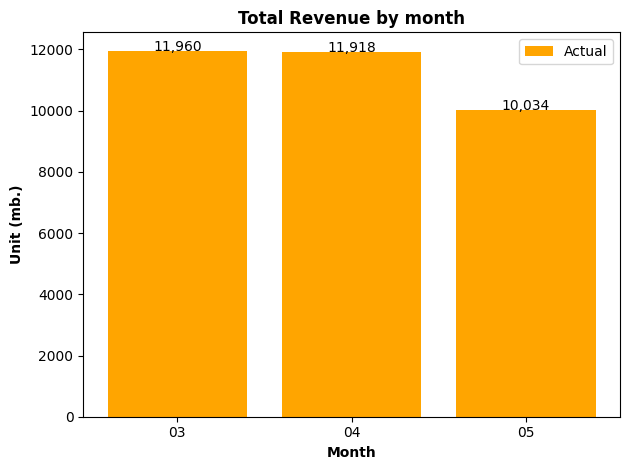

In [9]:
# plt.figure(figsize=(12,6))
# plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
    
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Total Revenue by month', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure().set_figwidth(12)

plt.plot(x_axis, y_tgt, '--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]))

plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Total Revenue : Monthly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i], y_ach[i]))
plt.xticks(x_axis, x)
plt.title('Total Revenue %Achieve & Different by month', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by month', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i], y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Weekly Performance

In [10]:
# Rawdata by week
df_rev_wk = df_rev_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_wk['%ACHIEVE'] = (df_rev_wk['ACTUAL_SNAP'] / df_rev_wk['TARGET_SNAP']) * 100
df_rev_wk['ACTUAL_DIFF'] = df_rev_wk['ACTUAL_SNAP'].diff().fillna(0)
df_rev_wk['LAST_WK_ACTUAL'] = df_rev_wk['ACTUAL_SNAP'] - df_rev_wk['ACTUAL_DIFF']
# df_rev_wk['FF_NULL_TEST'] = df_rev_wk['ACTUAL_DIFF'].fillna(0)

# Aggregation
x = df_rev_wk['TM_KEY_WK'].apply(str).str[5:]
x_axis = np.arange(len(x))
y_act = df_rev_wk['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_wk['TARGET_SNAP'].round(2)
y_ach = df_rev_wk['%ACHIEVE'].round(2)
y_diff = df_rev_wk['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_wk['LAST_WK_ACTUAL'].round(2)
# df_rev_wk.tail()

C:\Users\Narut4\AppData\Local\Temp\ipykernel_12608\1205398709.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_wk = df_rev_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


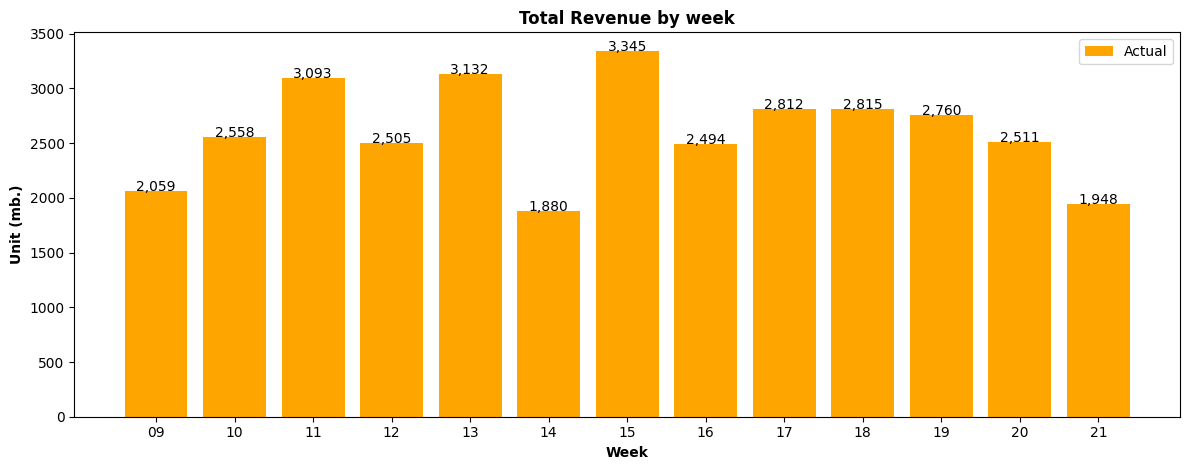

In [11]:
plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
    
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Total Revenue by week', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

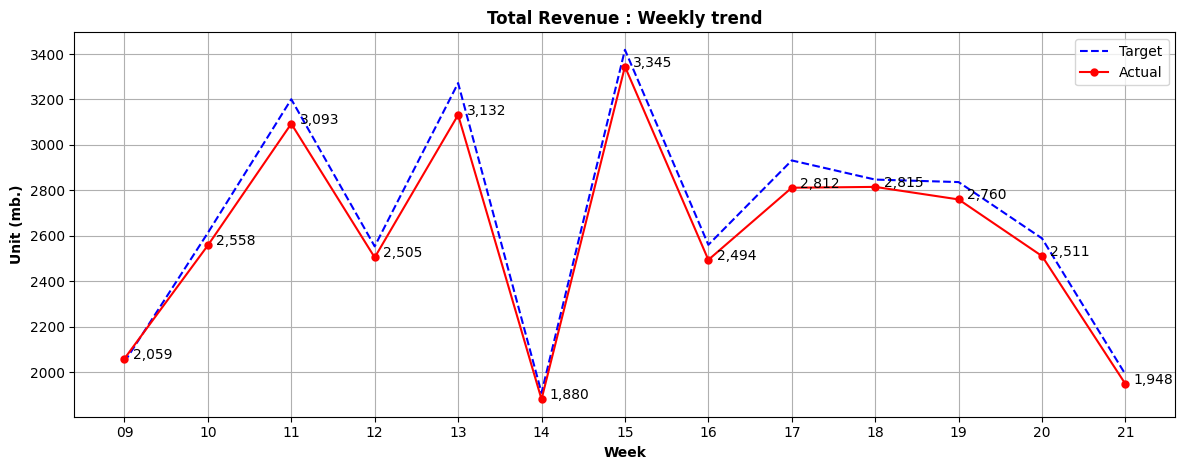

In [12]:
plt.figure().set_figwidth(12)

# plt.plot(x_axis, y_tgt, marker='.', markeredgewidth=3, label='Target', color='blue')
plt.plot(x_axis, y_tgt, 'b--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))

plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Total Revenue : Weekly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

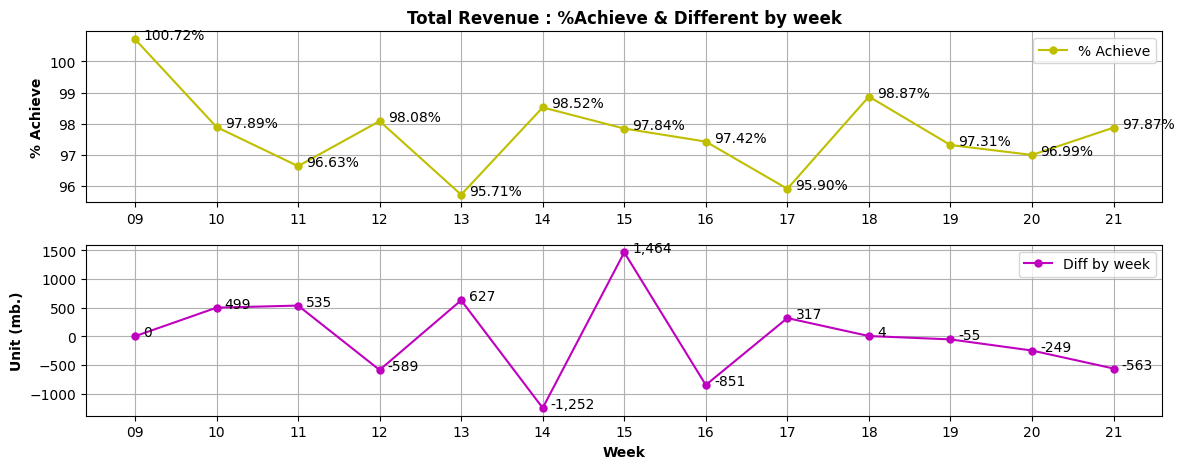

In [13]:
plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title('Total Revenue : %Achieve & Different by week', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by week', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()